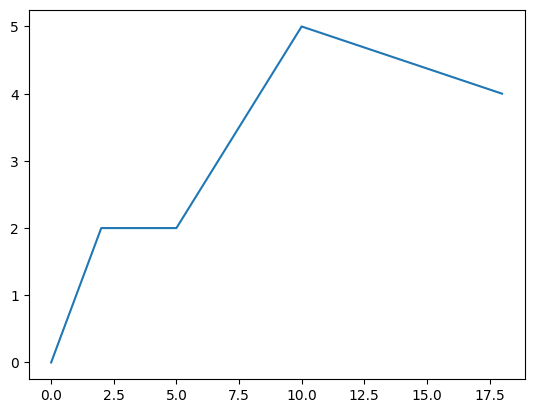

[ 0  2  5 10 18]


numpy.ndarray

In [29]:
import matplotlib.pyplot as plt
import numpy as np 

xpoints = np.array([0, 2 , 5 , 10 , 18 ])
ypoints = np.array([0, 2 , 2 , 5 , 4])

plt.plot(xpoints, ypoints)
plt.show()

print(xpoints)
type(xpoints)


In [2]:
from collections import deque
import time

# Maze example
maze_16x16 =  [
['S', 'W', 'W', 'W', ' ', ' ', ' ', ' ', 'W', ' ', ' ', 'W', ' ', ' ', ' ', 'E'],
[' ', ' ', ' ', 'W', 'W', 'W', 'W', ' ', 'W', 'W', 'W', ' ', 'W', ' ', 'W', ' '],
[' ', ' ', 'W', ' ', ' ', ' ', 'W', ' ', 'W', ' ', ' ', ' ', 'W', ' ', ' ', ' '],
[' ', 'W', ' ', ' ', 'W', ' ', 'W', ' ', ' ', ' ', 'W', ' ', 'W', 'W', 'W', ' '],
[' ', 'W', 'W', ' ', 'W', ' ', 'W', 'W', 'W', ' ', 'W', ' ', 'W', ' ', ' ', ' '],
[' ', ' ', 'W', ' ', 'W', ' ', ' ', ' ', ' ', ' ', 'W', ' ', ' ', ' ', 'W', ' '],
[' ', 'W', 'W', ' ', 'W', ' ', 'W', ' ', 'W', ' ', 'W', ' ', 'W', ' ', ' ', ' '],
[' ', ' ', ' ', ' ', 'W', ' ', 'W', ' ', ' ', ' ', ' ', ' ', 'W', ' ', 'W', ' '],
['W', 'W', 'W', 'W', 'W', ' ', 'W', ' ', 'W', 'W', 'W', 'W', 'W', ' ', 'W', ' '],
[' ', ' ', ' ', ' ', ' ', ' ', 'W', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'W', ' '],
['W', 'W', 'W', 'W', 'W', ' ', 'W', ' ', 'W', ' ', 'W', 'W', 'W', ' ', 'W', ' '],
[' ', ' ', ' ', ' ', 'W', ' ', ' ', ' ', 'W', ' ', ' ', ' ', ' ', ' ', 'W', ' '],
[' ', 'W', 'W', ' ', 'W', ' ', 'W', ' ', 'W', ' ', 'W', ' ', 'W', 'W', 'W', ' '],
[' ', 'W', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'W', ' ', ' ', ' ', ' ', ' '],
[' ', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', ' ', 'W', 'W', 'W', ' ', 'W', ' '],
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' '],
['W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W'],
 ]

# Function to print the maze
def print_maze(maze):
    for row in maze:
        print(' '.join(row))

# Breadth-First Search (BFS)
def bfs(maze, start, end):
    queue = deque([(start, [])])
    visited = set()

    while queue:
        current, path = queue.popleft()
        x, y = current

        if current == end:
            return path + [current]

        if 0 <= x < len(maze) and 0 <= y < len(maze[0]) and maze[x][y] != 'W' and current not in visited:
            visited.add(current)
            for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
                queue.append(((x + dx, y + dy), path + [current]))

# Depth-First Search (DFS)
def dfs(maze, start, end):
    stack = [(start, [])]
    visited = set()

    while stack:
        current, path = stack.pop()
        x, y = current

        if current == end:
            return path + [current]

        if 0 <= x < len(maze) and 0 <= y < len(maze[0]) and maze[x][y] != 'W' and current not in visited:
            visited.add(current)
            for dx, dy in [(1, 0), (-1, 0), (0, -1), (0, 1)]:
                stack.append(((x + dx, y + dy), path + [current]))

# Function to measure time taken
def measure_time(func, *args):
    start_time = time.time()
    result = func(*args)
    end_time = time.time()
    return result, end_time - start_time

# Maze start and end points
start_point = (0, 0)
end_point = (0, 15)

# Breadth-First Search
bfs_path, bfs_time = measure_time(bfs, maze_16x16, start_point, end_point)
print("BFS Path:", bfs_path)
print("BFS Steps:", len(bfs_path) - 1)
print("BFS Time:", bfs_time)

# Depth-First Search
dfs_path, dfs_time = measure_time(dfs, maze_16x16, start_point, end_point)
print("\nDFS Path:", dfs_path)
print("DFS Steps:", len(dfs_path) - 1)
print("DFS Time:", dfs_time)

# Display the maze with paths
for x, y in bfs_path:
    maze_16x16[x][y] = 'B'



print("\nMaze with Paths:")
print_maze(maze_16x16)

for x, y in dfs_path:
   maze_16x16[x][y] = 'D'


print("\nMaze with Paths:")
print_maze(maze_16x16)


BFS Path: [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (7, 1), (7, 2), (7, 3), (6, 3), (5, 3), (4, 3), (3, 3), (2, 3), (2, 4), (2, 5), (3, 5), (4, 5), (5, 5), (5, 6), (5, 7), (6, 7), (7, 7), (7, 8), (7, 9), (7, 10), (7, 11), (6, 11), (5, 11), (5, 12), (5, 13), (4, 13), (4, 14), (4, 15), (3, 15), (2, 15), (1, 15), (0, 15)]
BFS Steps: 39
BFS Time: 0.0011970996856689453

DFS Path: [(0, 0), (1, 0), (1, 1), (2, 1), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (7, 1), (7, 2), (7, 3), (6, 3), (5, 3), (4, 3), (3, 3), (2, 3), (2, 4), (2, 5), (3, 5), (4, 5), (5, 5), (5, 6), (5, 7), (5, 8), (5, 9), (4, 9), (3, 9), (2, 9), (2, 10), (2, 11), (3, 11), (4, 11), (5, 11), (5, 12), (5, 13), (4, 13), (4, 14), (4, 15), (3, 15), (2, 15), (2, 14), (2, 13), (1, 13), (0, 13), (0, 14), (0, 15)]
DFS Steps: 47
DFS Time: 0.0

Maze with Paths:
B W W W         W     W       B
B     W W W W   W W W   W   W B
B   W B B B W   W       W     B
B W   B W B W       W   W W W B
B W W B W B W W W   W 